<a href="https://colab.research.google.com/github/kaeatitayauk/CE888_2020_DSS/blob/master/Lab4%5Clab4_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc,f1_score
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [89]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [91]:
df.shape


(41188, 21)

In [92]:
df.isnull().sum() 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [93]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [94]:
df_dummies = pd.get_dummies(df)
df_dummies2 = df_dummies.drop(columns='y_no')
del df_dummies2['duration']
df_dummies2

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,0,0,0,1,0,1


C:\Users\nuttachai\anaconda3\envs\ce802\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


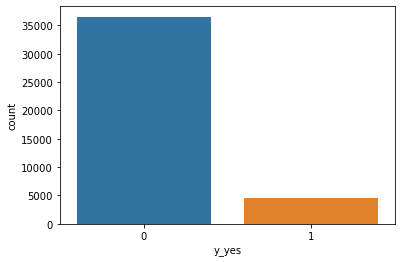

In [95]:
sns_plot = sns.countplot(df_dummies2["y_yes"])

In [96]:
X = df_dummies2.iloc[:,0:62].values
Y = df_dummies2["y_yes"].values
X_df = df_dummies2.iloc[:,0:62]

In [105]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
dummy_clf = DummyClassifier()
 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 50)

clf.fit(x_train,y_train)
print("f1_score: " , f1_score(y_test,clf.predict(x_test)))
scores = cross_val_score(clf, x_train, y_train, cv=10,scoring = make_scorer(f1_score))
dummy_clf.fit(xt,yt)


print("f1_score: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy f1_score: %0.2f"% (f1_score(Y,dummy_clf.predict(X))))
print(scores)

f1_score:  0.2708158116063919
f1_score: 0.26 +/- 0.02
Dummy f1_score: 0.11
[0.26785714 0.24107143 0.26636569 0.27678571 0.27312775 0.25720621
 0.24311927 0.27391304 0.24090909 0.29515419]
C:\Users\nuttachai\anaconda3\envs\ce802\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [106]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid = {'max_depth': np.arange(1, 16), 'n_estimators': [300]}
clf = GridSearchCV(RandomForestClassifier(), param_grid)
clf.fit(x_train, y_train)
clf.best_estimator_
#y_pred = CV_dtree.predict(x_validate)


print(f"for Grid Search CV the best parameter is {clf.best_params_}")



print("f1_score: " , f1_score(y_test,clf.predict(x_test)))
scores = cross_val_score(clf, x_train, y_train, cv=10,scoring = make_scorer(f1_score))
dummy_clf.fit(x_test,y_train)

print("f1_score: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy f1_score: %0.2f"% (f1_score(Y,dummy_clf.predict(X))))
print(scores)

KeyboardInterrupt: 

[ 8  7 61  4  2  5  6  3  0 60 49 43 52 50 42 53 33 44 14 17 10 34 59 27
 46 47 55 23 45  1 22 51 57 16 48 32 31 58 26  9 30 13 40 41 15 56 19 20
 25 37 36 29 38 39 21 54 28 24 35 12 18 11]
Feature ranking:
1. nr.employed (0.222513)
2. euribor3m (0.136263)
3. poutcome_success (0.117269)
4. emp.var.rate (0.111032)
5. pdays (0.107621)
6. cons.price.idx (0.068918)
7. cons.conf.idx (0.054343)
8. previous (0.034054)
9. age (0.026768)
10. poutcome_nonexistent (0.019703)
11. month_mar (0.017498)
12. contact_telephone (0.013249)
13. month_oct (0.012200)
14. month_may (0.011412)
15. contact_cellular (0.009916)
16. month_sep (0.009521)
17. default_no (0.005152)
18. month_apr (0.003658)
19. job_retired (0.002685)
20. job_student (0.002587)
21. job_blue-collar (0.001966)
22. default_unknown (0.001500)
23. poutcome_failure (0.001481)
24. education_basic.9y (0.001169)
25. month_dec (0.001030)
26. month_jul (0.000976)
27. day_of_week_mon (0.000919)
28. marital_single (0.000805)
29. month_aug (0.00047

(0.0, 0.5973429271524628)

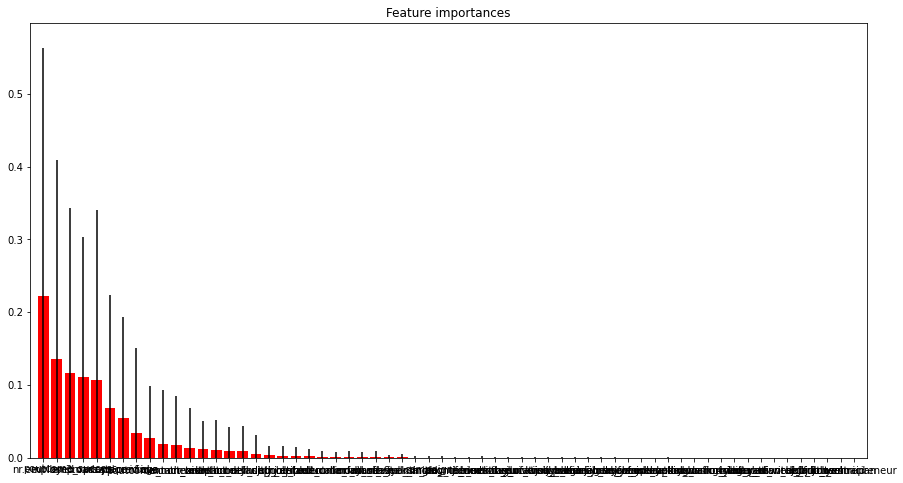

In [61]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")
Features = X_df.columns
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, Features[indices[f]],  importances[indices[f]]))
 
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(Features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


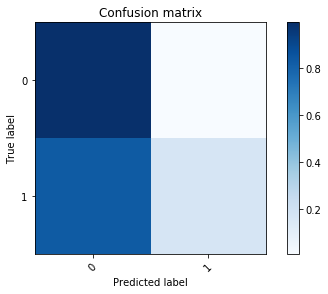

In [135]:
# Compute confusion matrix
y_pred = clf.predict(xv)
cnf_matrix = confusion_matrix(yv, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(yv))), normalize = True,
                      title='Confusion matrix')

#plt.savefig("confusion.png",bbox_inches='tight')
#plt.savefig("confusion.pdf",bbox_inches='tight')